# $$\text{Autoregressive Moving Average Model}$$

Here's a spec for what the ARMA notebook should include:
- Intuitive intro to the concepts - explain why might we think that using moving averages and autoregression would be useful, and also explain what they are
- Intro to the algorithm mathematically
- Code up the constituent parts, broken up with explanations
- Use what we've coded up on a demo dataset

## $\text{Learning Outcomes}$
1. Understanding the rationale behind ARMA models
2. Breaking down the theoritical background of the model
3. A Python implimentation on timeseries data

## $\text{ARMA Model}$
ARMA model is a forecasting procedure that combines Auto Regression and Moving Average models:
- AR: Auto Regression refers to the fact that we predict a future observation given historical data. In other words, the model converges towards a long term momentum.
- MA: Moving Average refers to the prediction procedure that incorporates the error from our past predictions to minimize future predictions' errors.

In the following example, we show how AR model alone fails to predict the seasonality of the data as we try to predict further in time. Instead, the AR model converges towards the mean of the observations.

In [180]:
# Importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA

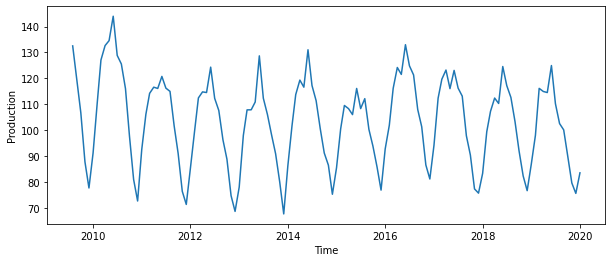

In [167]:
'''
Steps:
    1. Loading the data using Pandas package
    2. Changing the type of the time column into datatime
    3. Extract a portion of the data (10 years of monthly ice cream production levels)
    4. Draw the timeseries graph
'''

full_data = pd.read_csv('C:/Users/Taha/Desktop/ice_cream.csv')
full_data['DATE']= pd.to_datetime(full_data['DATE'], format='%Y-%m-%d')
data = full_data[full_data.index > 450]
plt.figure(figsize=(10, 4)); plt.ylabel('Production'); plt.xlabel('Time')
plt.plot(data.DATE, data.IPN31152N);

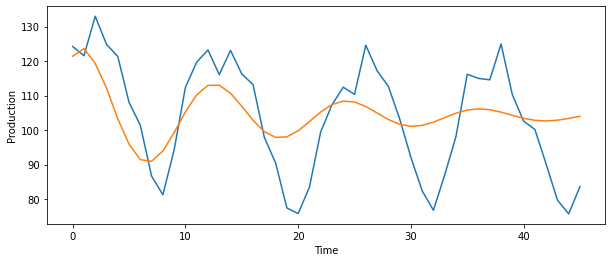

In [168]:
'''
In this cell, we train the AR model on the first 7 years of the data
then we try to forecast the coming 3 years.

Steps are as follow:
    1. decide on the parameter of p for the AR model: p stands for the number of timesteps
        that our forecasting equation incorporates as an input. In this case (p=5), but we will
        discuss some heuristics on how to pick its value.
    2. we fit the model through the historical data using the function "model.fit()"
    3. We generate prediction for 3 years ahead then compare them agaist the true 
        observations of the ice cream productions.
'''

model = ARMA(data['IPN31152N'].values[:80], order=(5, 0))
model_fit = model.fit()
predictions = model_fit.predict(start=80, end=125)
plt.figure(figsize=(10, 4)); plt.ylabel('Production'); plt.xlabel('Time')
plt.plot(data['IPN31152N'].values[80:]); plt.plot(predictions);

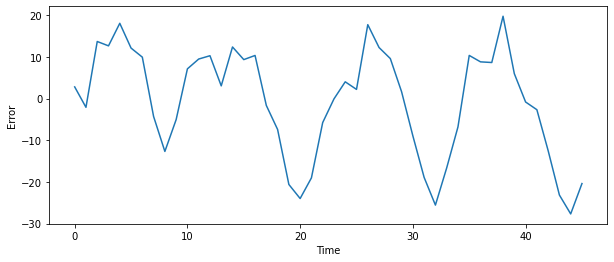

In [169]:
'''
Plotting the error (gap between predicted and actual observation)
This procedure helps us disentangle any missed patters by our model.
We notice that the error is producing a regular pattern that the model didn't capture
'''
plt.figure(figsize=(10, 4)); plt.ylabel('Error'); plt.xlabel('Time')
plt.plot(data['IPN31152N'].values[80:]-predictions);

## $\text{Theoritical Background}$

The theoritical equation for the $ARMA(1, 1)$ model is literally a sum of the Auto Regression equation and the Movering Average equation. The two equations show that $\epsilon_{t}$ is the key difference between an observation and a prediction. The variable stands for the error in the current time step.

The parameters of the model, namely p and q, are the number of time steps that the equation has to account for in the AR and MA expression. In other words, the number of time steps that we use for AR and MA might be different.

![ARMA.jpg](ARMA.jpg)

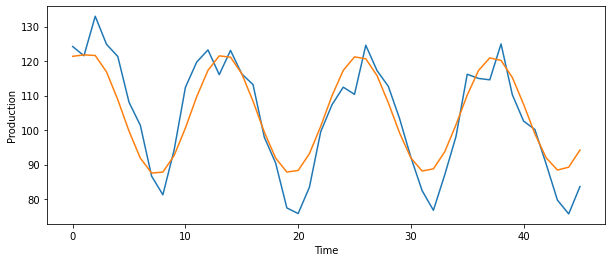

In [197]:
model = ARMA(data['IPN31152N'].values[:80], order=(2, 3))
model_fit = model.fit()
predictions = model_fit.predict(start=80, end=125)
plt.figure(figsize=(10, 4)); plt.ylabel('Production'); plt.xlabel('Time')
plt.plot(data['IPN31152N'].values[80:]); plt.plot(predictions);

## $\text{Model's Parameters}$
The choice of the model parameters p and q depends on the autocorrelation and partial autocorrelation in the data on interest. Although the process is a heuristic, it might still better than extensively looking through all possible combinations of p and q given the Akaike information criterion.

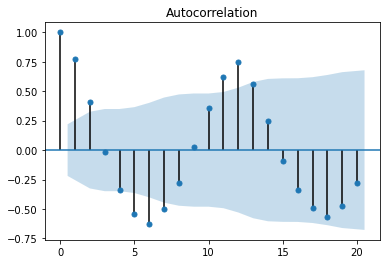

In [189]:
plot_acf(data['IPN31152N'].values[:80]);

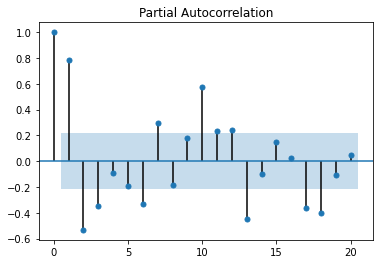

In [190]:
plot_pacf(data['IPN31152N'].values[:80]);